# Explore here

In [2]:
# Your code here
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from pickle import dump

In [3]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [4]:
# Datetime
df_interim = df_raw.copy()
df_interim["date"] = pd.to_datetime(df_interim.date)
df_interim = df_interim.set_index("date")
ts = df_interim["sales"]
ts.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

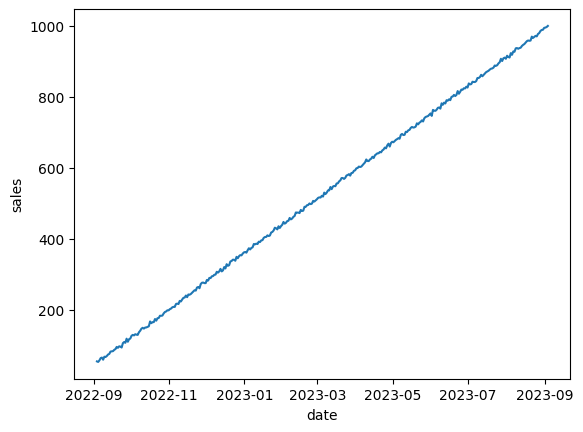

In [5]:
sns.lineplot(data=ts)
plt.show()

In [6]:
def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

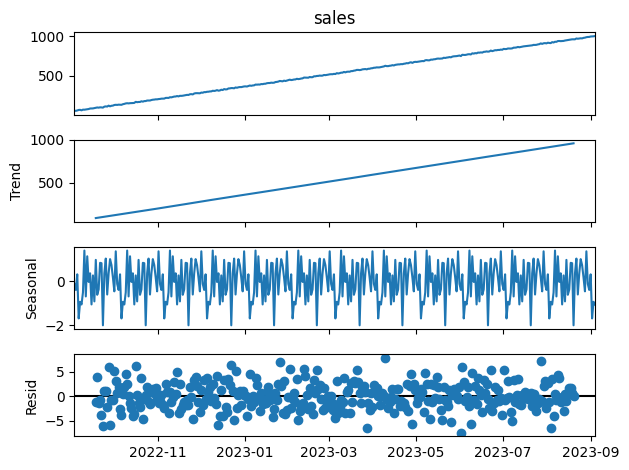

In [7]:
# Seasonal descompose

result = seasonal_decompose(df_interim['sales'], model='additive', period=30)
result.plot()
plt.show()

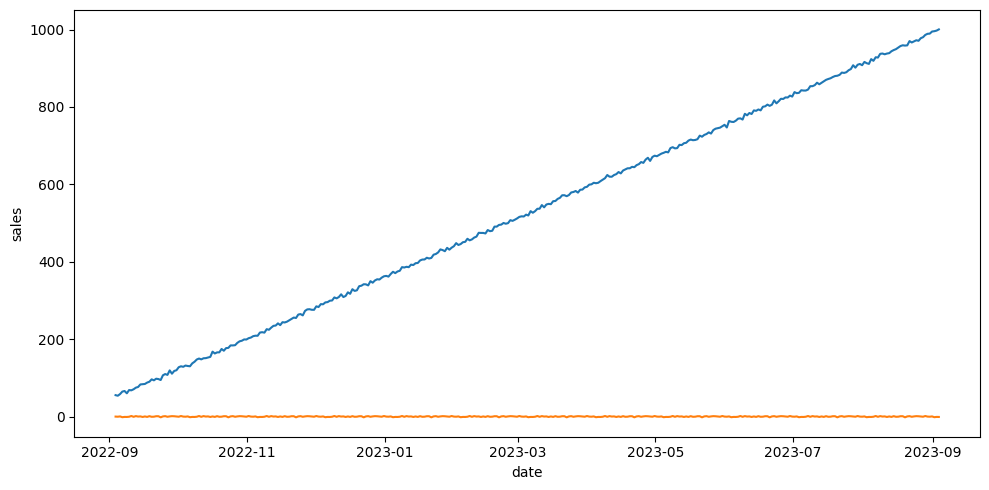

In [8]:
seasonal = result.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [9]:
def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

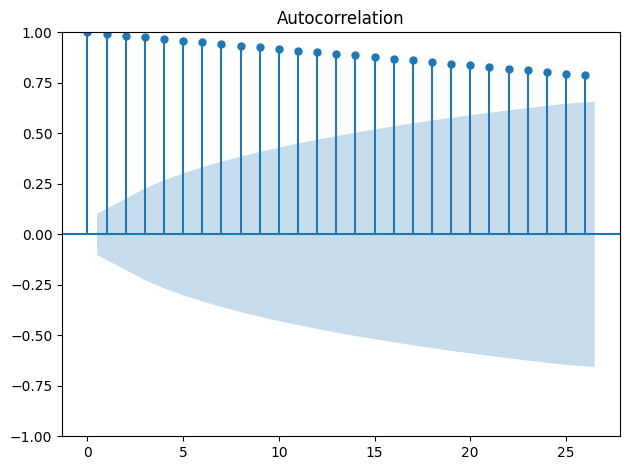

In [10]:
# Analisis autocorrelacion

plot_acf(ts)

plt.tight_layout()

plt.show()

In [11]:
model = ARIMA(df_interim['sales'], order=(1, 1, 1))
fitted_model = model.fit()

/workspaces/Serie_Temporal_Alternativa/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/Serie_Temporal_Alternativa/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/Serie_Temporal_Alternativa/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [12]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1049.226
Date:                Thu, 09 Jan 2025   AIC                           2104.453
Time:                        00:09:21   BIC                           2116.152
Sample:                    09-03-2022   HQIC                          2109.102
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2025.703      0.000       0.999       1.001
ma.L1         -0.9996      0.440     -2.271      0.023      -1.862      -0.137
sigma2        18.1480      8.139      2.230      0.026       2.195      34.101
===================================================================================
Ljung-Box (L1) (Q):                 106.92   Jarque-Bera (JB):                 3.07
Prob(Q):                              0.00   Prob(JB):                         0.22
Heteroskedasticity (H):               1.05   Skew:                             0.22
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
forecast = fitted_model.get_forecast(steps=30)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

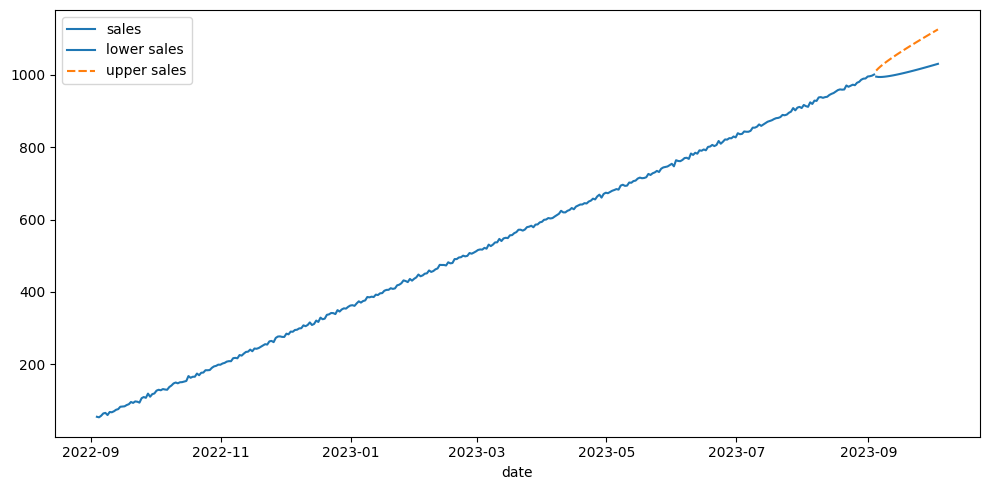

In [14]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df_interim)
sns.lineplot(data = confidence_intervals, c = "green")

plt.tight_layout()

In [15]:
dump(model, open("../data/processed/ARIMA_2024.sav", "wb"))